In [275]:
from keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

def hardlim(x):
    return K.cast(K.greater(x, 0.5), K.floatx())

In [276]:
import numpy as np
import keras.backend as kb

X_train=np.array([[-0.5, -0.5, 0.3, 0], [-0.5, 0.5, -0.5, 1.0]]).T 
y_train=np.array([[1.0, 1.0, 0.0, 0.0]]).T


In [277]:
import tensorflow as tf

neural_network = tf.keras.models.Sequential(
    [
        tf.keras.layers.Flatten(input_shape = [2]),
        tf.keras.layers.Dense(1, activation='sigmoid'),
    ]
)

neural_network.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ['mse']
)

In [278]:
history = neural_network.fit(
    X_train, y_train, epochs = 500, 
    verbose = 1
)

Epoch 1/500
1/1 [==============================] - 0s 310ms/step - loss: 0.5180 - mse: 0.1647
Epoch 2/500
1/1 [==============================] - 0s 3ms/step - loss: 0.5178 - mse: 0.1646
Epoch 3/500
1/1 [==============================] - 0s 4ms/step - loss: 0.5175 - mse: 0.1644
Epoch 4/500
1/1 [==============================] - 0s 5ms/step - loss: 0.5173 - mse: 0.1643
Epoch 5/500
1/1 [==============================] - 0s 3ms/step - loss: 0.5171 - mse: 0.1642
Epoch 6/500
1/1 [==============================] - 0s 4ms/step - loss: 0.5169 - mse: 0.1641
Epoch 7/500
1/1 [==============================] - 0s 4ms/step - loss: 0.5166 - mse: 0.1640
Epoch 8/500
1/1 [==============================] - 0s 3ms/step - loss: 0.5164 - mse: 0.1639
Epoch 9/500
1/1 [==============================] - 0s 6ms/step - loss: 0.5162 - mse: 0.1638
Epoch 10/500
1/1 [==============================] - 0s 4ms/step - loss: 0.5160 - mse: 0.1637
Epoch 11/500
1/1 [==============================] - 0s 3ms/step - loss: 0.515

In [279]:
neural_network.predict(X_train)

1/1 [==============================] - 0s 42ms/step


array([[0.70530117],
       [0.6460495 ],
       [0.35564208],
       [0.38921052]], dtype=float32)

In [280]:
x1 = np.linspace(-1,1,100)
x2 = np.linspace(-1,2,100)

X1, X2 = np.meshgrid(x1, x2)


In [281]:
Z = neural_network(np.stack([X1.flatten(), X2.flatten()]).T)
Z = np.where(Z > 0.5, 1, 0) 
Z = np.array(Z).reshape(100,100)

In [282]:
X_train[:2,0]
X_train[2:4,0]

array([0.3, 0. ])

In [283]:
X_train[2:4,1]

array([-0.5,  1. ])

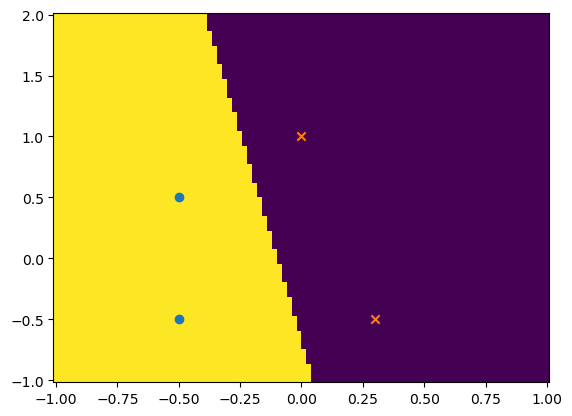

In [284]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()#subplot_kw={"projection": "3d"})
ax.pcolormesh(X1,X2,Z)
ax.scatter(X_train[:2,0], X_train[:2,1], marker='o')
ax.scatter(X_train[2:4,0], X_train[2:4,1], marker='x')

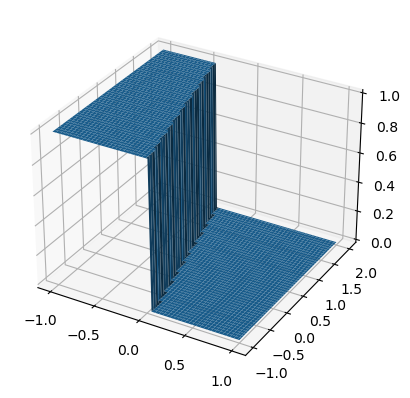

In [285]:

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(X1, X2, Z)